In [1]:
import numpy as np
from scipy import optimize
import numpy as np
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz

# Solving problem directly

## for a varying Alpha....

In [2]:
import numpy as np
from scipy import optimize
import numpy as np
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
def sample(function, xmin=0, xmax=1, ymax=1.2):
    while True:
        x = np.random.uniform(low=xmin, high=xmax)
        y = np.random.uniform(low=0, high=ymax)
        if y < function(x)*1.00001:
            return x

def f(x):
    return x**a

def getprobs(mass,alphas):
    normprob=[]
    prob = []
    probs =[]
    
    pdfs=[]
    for a in alphas:
        pdfs=[]
        for m in mass:
            plaw=m**(a)
            ap = a+1
            norm = ((1e8)**ap / ap ) - ((1e5)**ap / ap)
            plaw=plaw/norm
            pdfs.append(plaw*1e8)

        normprob=np.prod(pdfs)
        probs.append(normprob)
    
    return probs

def plaw(mass,alpha):
        plaw=m**(a)
        ap = a+1
        norm = ((1e8)**ap / ap ) - ((1e5)**ap / ap)
        plaw=plaw/norm
        pdfs.append(plaw*1e8)
        
        return pdfs
    
def interp(x,probs,alphas,tol,verbose):
    b=0
    x=int(x)
    b=x+3 ##add 5 to skip any probabilities that occur more than once too close to the start
    rightside=0
    i=1
    check=False
    mid=np.where(probs == np.max(probs))[0]
    while check == False:
        rightside= np.interp(alphas[mid+i], alphas,probs)
        check = np.isclose(probs[x],rightside,tol)
        #check= math.isclose(probs[x], rightside, rel_tol=tol, abs_tol=0.0)
        #check= math.isclose(probs[x], rightside, rel_tol=tol*10, abs_tol=0.0)
        #check= math.isclose(probs[x], rightside, rel_tol=tol/100, abs_tol=0.0)
        if verbose ==True:
            print(probs[x],rightside)
        
        i=i+1
    return rightside 

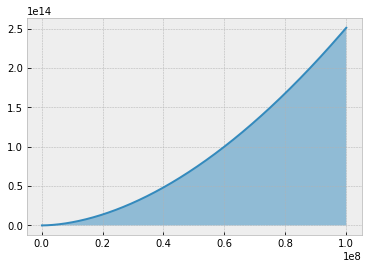

In [85]:
a=1.8
m =np.linspace(int(1e5), int(1e8), 1000)
dist=m**(a)
plt.plot(m,dist)
plt.fill_between(m,dist,alpha=0.5)
truea=a
plt.show()

Rejection sampling, where r is the amount of samples created under the curve

In [90]:
yvals=f(m)
r=10000
xvals = np.linspace(int(1e5), int(1e8), 1000)
samps = [sample(f,0,1e8,max(dist)) for i in range(r)]
import random
plaw_masses=[]
samplesize=20
for i in range(samplesize): ##amount of masses chosen from the distribution, 20 masses for 10 binaries
    plaw_masses.append(random.choice(samps))


In [76]:
normprob=[]
prob = []
probs =[]
alphas = np.linspace(-10,10,1000)
pdfs=[]
for a in alphas:
    pdfs=[]
    for m in plaw_masses:
        pdfs=plaw(m,a)
    normprob=np.prod(pdfs)
    probs.append(normprob)

l= probs.index(max(probs))
p= alphas[l]
v= max(probs)

probs=np.array(probs) ## make prob list a np array
probs = probs[~np.isnan(probs)] ##remove nan values
area = trapz(probs, x=alphas)
probs = probs / area
area = trapz(probs, x=alphas) # Check this is 1
print(area)

0.9999999999999998


In [82]:
areaclose=False

x=10
x=np.max(np.where(probs==0))
while areaclose == False :

    brute= interp(x,probs,alphas,7e-2,verbose=False)
    np.where(probs == brute)
    alphas[np.where(probs == brute)]
    rightalpha= np.where(probs == brute)[0]
    rightalpha = int(rightalpha)
    area =trapz(probs[x:rightalpha], x=alphas[x:rightalpha])
    areaclose=np.isclose([area],[0.9],0.001)
    areaclose=np.isclose([area],[0.9],0.01)
    #areaclose=np.isclose([area],[0.9],0.1)
    x=x+1
print("Area enclosed:", trapz(probs[x:rightalpha], x=alphas[x:rightalpha]))



Area enclosed: 0.8912896614224911


Error "index 1000" is out of bounds for axis 0 with size 1000 indicates that the interpolation hasn't found a corresponding value on the right hand side of the curve, with the current olerance. This can be made bigger, or rerunning from the rejection sampling code can sometimes generate values that interpolate at a better precision

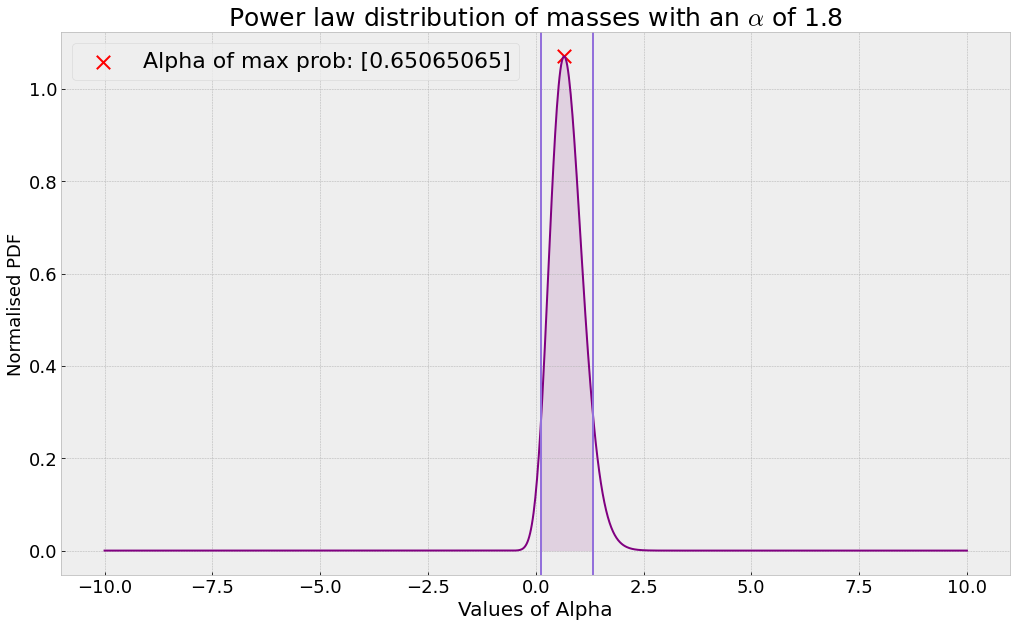

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycbc.cosmology import redshift
from matplotlib import colors
cnames=list(colors.cnames)
from matplotlib import ticker
from matplotlib import cm
plt.style.use('bmh')
plt.figure(figsize=(17,10))
plt.title(("Power law distribution of masses with an $\\alpha$ of {}").format(truea), fontsize = 25)


plt.plot(alphas,probs,c="purple")
plt.axvline(x=alphas[x],c="mediumpurple")
plt.axvline(x=alphas[rightalpha-1], c="mediumpurple")

plotprobs= probs[x:int(np.where(probs == brute)[0])]
plotalphas = alphas[x:int(np.where(probs == brute)[0])]

#= probs.index(max(probs))
l=np.where(probs==max(probs))
p= alphas[l]
v= max(probs)

plt.scatter(alphas[l],probs[l],marker='x',color='red',s=180,label =("Alpha of max prob: {}").format(p))

plt.fill_between(plotalphas,plotprobs,color= 'thistle',alpha=0.6)



plt.xlabel("Values of Alpha", fontsize=20)
plt.ylabel("Normalised PDF", fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)


#plt.text(0.01,0.5,'90% Confidence Region',size=18)
#plt.text(1,1.2,'$0.23^{+0.50}_{-0.40}$',size=40)


#plt.xlim(-1,1.5)
#plt.ylim(0.01,1.5)
plt.legend(loc="best", prop={'size': 22})
#plt.savefig('alpha_of_1.8.png')
plt.show()

<Figure size 792x576 with 0 Axes>

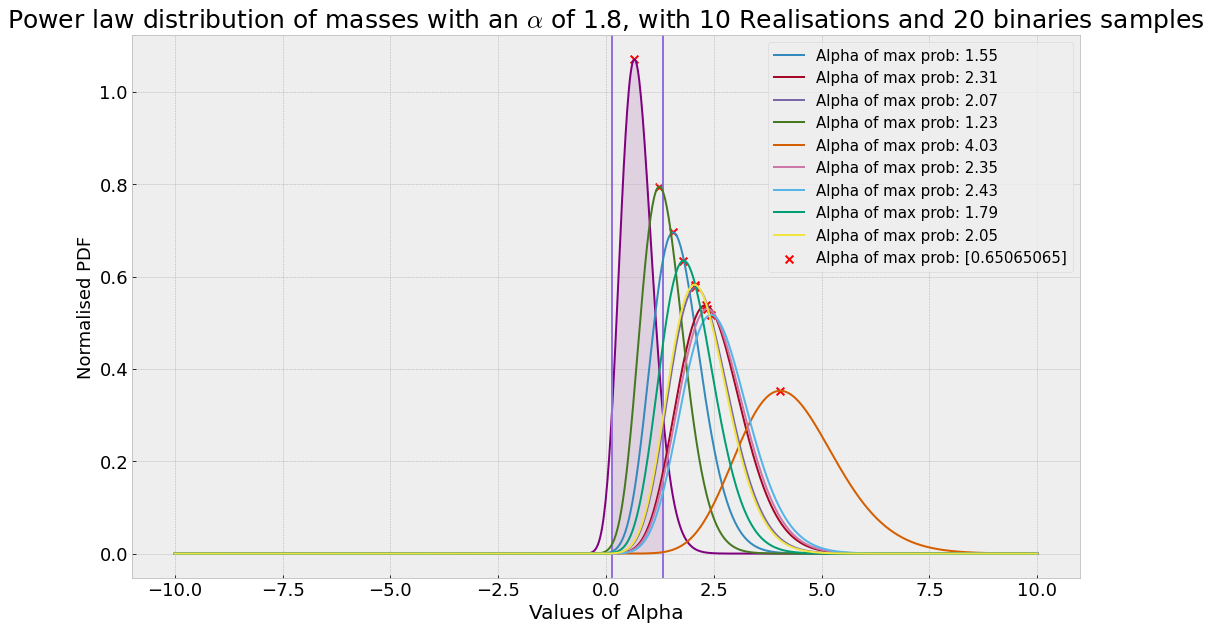

In [92]:
import math
from matplotlib import colors
cnames=list(colors.cnames)
from matplotlib import ticker
import pandas as pd
from matplotlib import cm
alphas = np.linspace(-10,10,1000)
plaw_masses=[]
allprobs=[]
plt.figure(figsize=(11,8))
plt.figure(figsize=(17,10))



plt.plot(alphas,probs,c="purple")
plt.axvline(x=alphas[x],c="mediumpurple")
plt.axvline(x=alphas[rightalpha-1], c="mediumpurple")

plotprobs= probs[x:int(np.where(probs == brute)[0])]
plotalphas = alphas[x:int(np.where(probs == brute)[0])]
l=np.where(probs==max(probs))
p= alphas[l]
v= max(probs)

plt.scatter(alphas[l],probs[l],marker='x',color='red',s=60,label =("Alpha of max prob: {}").format(p))

plt.fill_between(plotalphas,plotprobs,color= 'thistle',alpha=0.6)




# plt.fill_between(plotalphas,plotprobs,color= 'thistle',alpha=0.6)



plt.xlabel("Values of Alpha", fontsize=20)
plt.ylabel("Normalised PDF", fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)




colors = [cm.Blues(x) for x in np.linspace(0, 1,10)]
labels=[]

allprobs=[]
peakalphas=[]
realisations=10
for i in range(realisations-1): ##-1 to count for original realisation
        masses=[]
        masses.append(random.choices(samps,k=20))
        probs_iter =getprobs(masses,alphas)
        l= probs_iter.index(max(probs_iter))
        p= alphas[l]
        peakalphas.append(p)
        p = "{:.2f}".format(p)
        v= max(probs_iter)
        labels.append(("Alpha of max prob: {}").format(p) )
        allprobs.append(probs_iter)
        probs_iter=np.array(probs_iter) ## make prob list a np array
        probs_iter = probs_iter[~np.isnan(probs_iter)] ##remove nan values
        area = trapz(probs_iter, x=alphas)
        probs_iter = probs_iter / area
        area = trapz(probs_iter, x=alphas) # Check this is 1
        plt.plot(alphas,probs_iter,label=labels[i])
        plt.scatter(alphas[l],probs_iter[l],marker='x',color='red',s=60)
        
        #plt.fill_between(alphas,probs,alpha=0.1)
plt.title(("Power law distribution of masses with an $\\alpha$ of {}, with {} Realisations and {} binaries samples").format(truea,realisations,samplesize), fontsize = 25)
#plt.xlim(-1,3)
#plt.xlim(-0,3)
# plt.ylim(0.01,1.2)
# plt.text(1.2,0.25,'90% Confidence Region',size=13)
plt.legend(loc="best",prop={'size': 15})
#plt.savefig('power_law_1.8_250samples_dissertation.png')
plt.show()

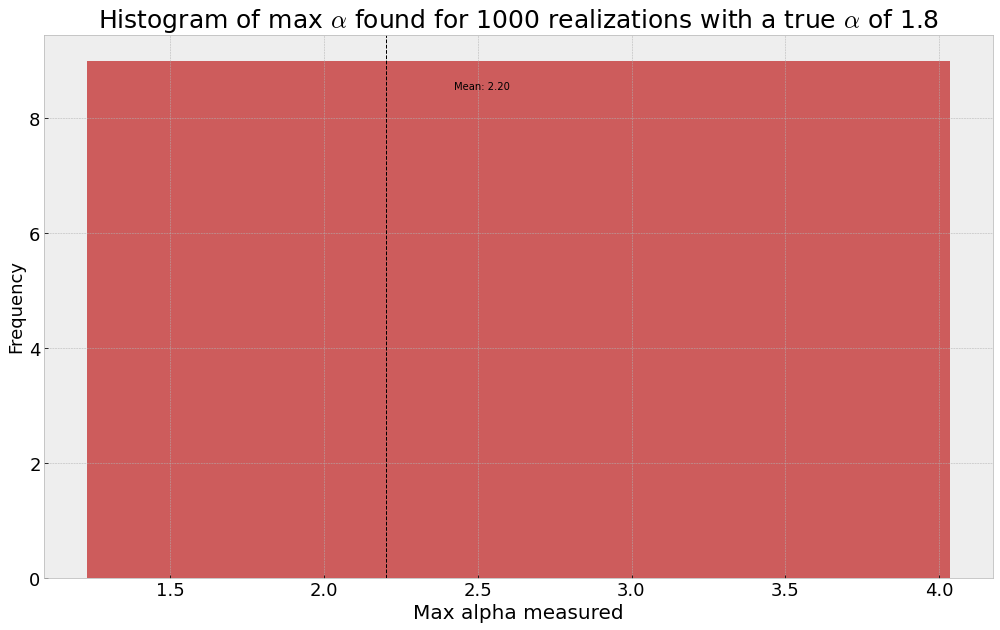

In [93]:
from statistics import mean
plt.figure(figsize=(17,10))
plt.style.use('bmh')
plt.title(("Histogram of max $\\alpha$ found for {} realisations with a true $\\alpha$ of {}").format(realisations,true, fontsize = 25)
plt.xlabel("Max alpha measured", fontsize=20)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)


plt.hist(peakalphas,bins=1,color="indianred")
plt.axvline(mean(peakalphas) ,color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean(peakalphas)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean(peakalphas)))
#plt.savefig('pophist_1000.png')
plt.show()